<a href="https://colab.research.google.com/github/sviatmykytyn/python-portfolio-project/blob/main/store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive
import matplotlib.patches as mpatches
import plotly.express as px
import matplotlib.ticker as mtick

In [ ]:
# Load datasets from GitHub
events_url = "https://raw.githubusercontent.com/sviatmykytyn/python-portfolio-project/main/events.csv"
products_url = "https://raw.githubusercontent.com/sviatmykytyn/python-portfolio-project/main/products.csv"
countries_url = "https://raw.githubusercontent.com/sviatmykytyn/python-portfolio-project/main/countries.csv"

events = pd.read_csv(events_url) # sales performance over the years
products = pd.read_csv(products_url) # product categories
countries = pd.read_csv(countries_url) # countries and regions

# Data overview

In [ ]:
from IPython.display import display

# Preview of all datasets
print("Events")
display(events.head())

print("="*40)
print("Products")
display(products.head())

print("="*40)
print("Countries")
display(countries.head())

Events


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


Products


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


Countries


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


## Events

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
print(f"Number of rows: {events.shape[0]}")
print(f"Number of columns: {events.shape[1]}")

Number of rows: 1330
Number of columns: 10


> Опис колонок

- **Order ID** — унікальний ідентифікатор замовлення.  
- **Order Date** — дата створення замовлення.  
- **Ship Date** — дата відправки замовлення.  
- **Order Priority** — пріоритет:  
  - H = High (високий)  
  - M = Medium (середній)  
  - L = Low (низький)  
  - C = Critical (критичний)  
- **Country Code** — код країни замовлення (*NOR*, *SRB*, *MNE*).  
- **Product ID** — ідентифікатор продукту в базі.  
- **Sales Channel** — канал продажу (*Online* / *Offline*).  
- **Units Sold** — кількість проданих одиниць товару.  
- **Unit Price** — ціна продажу за одиницю.  
- **Unit Cost** — собівартість одиниці товару.  

## Products

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
print(f"Number of rows: {products.shape[0]}")
print(f"Number of columns: {products.shape[1]}")

Number of rows: 12
Number of columns: 2


> Опис колонок

- **id** — унікальний ідентифікатор продукту.
- **item_type** — категорія або тип продукту.

## Countries

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(f"Number of rows: {countries.shape[0]}")
print(f"Number of columns: {countries.shape[1]}")

Number of rows: 249
Number of columns: 5


> Опис колонок

- **name** — офіційна назва країни.  
- **alpha-2** — дволітерний код країни (*AL* для Албанії).  
- **alpha-3** — трилітерний код країни (*ALB* для Албанії).  
- **region** — регіон світу, до якого належить країна (*Europe*, *Asia*, *Africa*).  
- **sub-region** — субрегіон усередині регіону (*Northern Europe*, *Southern Asia*).  

## Key columns for merging tables

- **Events ↔ Products**  
  - `events.Product ID` = `products.id`  
  Використовується для визначення категорії товару (*item_type*).  

- **Events ↔ Countries**  
  - `events.Country Code` = `countries.alpha-3`  
  Використовується для отримання назви країни (*name*), регіону (*region*) та субрегіону (*sub-region*).

# Data cleaning

## Events

In [ ]:
# Create DataFrame with missing values count and percent
missing_info_events = pd.DataFrame({
    "missing count": events.isna().sum(),
    "missing percent": events.isna().mean() * 100
})

print(missing_info_events)

                missing count  missing percent
Order ID                    0         0.000000
Order Date                  0         0.000000
Ship Date                   0         0.000000
Order Priority              0         0.000000
Country Code               82         6.165414
Product ID                  0         0.000000
Sales Channel               0         0.000000
Units Sold                  2         0.150376
Unit Price                  0         0.000000
Unit Cost                   0         0.000000


У наборі даних пропуски зосереджені лише у двох стовпцях:
- **Country Code** має близько **`6%` пропусків**, що виглядає як системна проблема — дані надходили не з усіх джерел або не завжди збиралися.  
- **Units Sold** має лише **`0.15%` пропусків**, ймовірно через помилки введення або поодинокі технічні збої.  

In [ ]:
# Fill gaps in the "Country Code" column with "Unknown"
events["Country Code"] = events["Country Code"].fillna("Unknown")

Пропуски у полі **Country Code** заповнено значенням `Unknown`. Частка відсутніх даних становить **`6.17%`**, що є суттєвою величиною, тому їх видалення могло б призвести до викривлення фінансових показників. Використання `Unknown` дозволяє зберегти всі записи та виокремити їх в окрему категорію для подальшого аналізу.

In [ ]:
# Fill gaps in the "Units Sold" column with the median value
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].median())

Пропуски у полі **Units Sold** (**`0.15%`**) заповнено медіаною по стовпцю, оскільки вона стійка до викидів і краще відображає типовий рівень продажів. Рядки з пропусками збережено, щоб уникнути втрат у даних та забезпечити повноту аналізу.

In [ ]:
# Check if there are any missing values
print(f"Number of missing values: {events.isna().sum().sum()}")

Number of missing values: 0


In [ ]:
# Check data types of all columns
print(events.dtypes)

Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


In [ ]:
# Changing the data type to datetime
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])

Було перетворено стовпці **Order Date** і **Ship Date** у формат **`datetime64[ns]`**, усі інші стовпці розпізнаються коректно.

In [ ]:
# Data transformation
events = events.apply(lambda col: col.str.title().str.strip() if col.dtypes == "object" else col)

In [ ]:
# Check for duplicates across all columns
print(f"Number of duplicates: {events.duplicated().sum()}")

Number of duplicates: 0


У даних **відсутні дублікати**.

In [ ]:
# Quick statistical overview
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


Є потенційна аномалія з обсягами продажів (`9999` одиниць). Виглядає підозріло: це може бути максимальне граничне значення, встановлене системою.

## Products

In [ ]:
# Create DataFrame with missing values count and percent
missing_info_products = pd.DataFrame({
    "missing count": products.isna().sum(),
    "missing percent": products.isna().mean() * 100
})

print(missing_info_products)

           missing count  missing percent
id                     0              0.0
item_type              0              0.0


У наборі даних **пропуски відсутні**.

In [ ]:
# Check data types of all columns
print(products.dtypes)

id            int64
item_type    object
dtype: object


Усі стовпці **розпізнаються коректно**.

In [ ]:
# Data transformation
products = products.apply(lambda col: col.str.title().str.strip() if col.dtypes == "object" else col)

In [ ]:
# Check for duplicates across all columns
print(f"Number of duplicates: {products.duplicated().sum()}")

Number of duplicates: 0


У даних **відсутні дублікати**.

## Countries

In [ ]:
# Create DataFrame with missing values count and percent
missing_info_countries = pd.DataFrame({
    "missing count": countries.isna().sum(),
    "missing percent": countries.isna().mean() * 100
})

print(missing_info_countries)

            missing count  missing percent
name                    0         0.000000
alpha-2                 1         0.401606
alpha-3                 0         0.000000
region                  1         0.401606
sub-region              1         0.401606


In [ ]:
# Show all rows with at least one missing value
countries[countries.isna().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


У наборі даних пропуски зосереджені у трьох стовпцях:
- Відсутні значення у **region** та **sub-region** для **name** *Antarctica*. Причиною є те, що Антарктида не належить до жодного регіону чи підрегіону, тому пропуски є логічними та очікуваними.
- Відсутнє значення у **alpha-2** для **name** *Namibia*. Ймовірна причина — технічна або випадкова втрата даних, адже офіційний код існує — **NA**.

In [ ]:
# Fill gaps in the "alpha-2" column with "NA"
countries["alpha-2"] = countries["alpha-2"].fillna("NA")

Пропуск у полі **alpha-2** для *Namibia* замінено на офіційний код, оскільки це лише одиничний технічний недолік, що не потребує видалення запису.

In [ ]:
# Count how many rows have Country Code equal to "Ata"
print(f"Rows with 'Ata' in Country Code: {(events['Country Code'] == 'Ata').sum()}")

Rows with 'Ata' in Country Code: 0


In [ ]:
# Delete the row where country name is "Antarctica"
countries = countries[countries["name"] != "Antarctica"]

Рядок із *Antarctica* **було видалено**, оскільки у фактичних даних ця країна не зустрічається, а відсутність значень у полях **region** та **sub-region** не несе аналітичної цінності.

In [ ]:
# Check if there are any missing values
print(f"Number of missing values: {countries.isna().sum().sum()}")

Number of missing values: 0


In [ ]:
# Check data types of all columns
print(countries.dtypes)

name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


Усі стовпці **розпізнаються коректно**.

In [ ]:
# Data transformation
countries = countries.apply(lambda col: col.str.title().str.strip() if col.dtypes == 'object' else col)

In [ ]:
# Check for duplicates across all columns
print(f"Number of duplicates: {countries.duplicated().sum()}")

Number of duplicates: 0


У даних **відсутні дублікати**.

# Data analysis and visualization

## Merge and clean three DataFrames

In [ ]:
# Merge events, product and countries using different key column names
sales_data = (
    events
    .merge(products, left_on="Product ID", right_on="id")
    .merge(countries, left_on="Country Code", right_on="alpha-3", how="left")
)

In [ ]:
# Drop duplicate or unnecessary columns
sales_data.drop(columns=["id", "alpha-2", "alpha-3"], inplace=True)

Видалення колонок **id**, **alpha-2**, **alpha-3**, бо вони дублювали вже наявну інформацію й не мали додаткової цінності для аналізу.

In [ ]:
# Filling in the empty values
sales_data["name"] = sales_data["name"].fillna("Unknown")
sales_data["region"] = sales_data["region"].fillna("Unknown")
sales_data["sub-region"] = sales_data["sub-region"].fillna("Unknown")

In [ ]:
# Rename selected columns
sales_data.rename(columns={
    "item_type": "category",
    "name": "country_name"
}, inplace=True)

In [ ]:
# Transform Country Code to uppercase, except "Unknown"
sales_data["Country Code"] = sales_data["Country Code"].apply(
    lambda x: x if x == "Unknown" else str(x).upper()
)

In [ ]:
# Convert column names to snake_case
sales_data.columns = (
    sales_data.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

In [ ]:
sales_data.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,category,country_name,region,sub_region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


## Key metrics

In [ ]:
# Add financial metric columns
sales_data["revenue"] = sales_data["units_sold"] * sales_data["unit_price"]
sales_data["cost"] = sales_data["units_sold"] * sales_data["unit_cost"]
sales_data["profit"] = sales_data["revenue"] - sales_data["cost"]

# Add processing time column (in days)
sales_data["processing_time"] = (sales_data["ship_date"] - sales_data["order_date"]).dt.days

In [ ]:
# Key metrics
total_orders = sales_data["order_id"].nunique()
total_revenue = sales_data["revenue"].sum()
total_cost = sales_data["cost"].sum()
total_profit = sales_data["profit"].sum()
total_units = sales_data["units_sold"].sum()
countries = sales_data["country_code"].nunique()
regions = sales_data["region"].nunique()
subregs = sales_data["sub_region"].nunique()
item_types = sales_data["category"].nunique()
avg_processing_time = sales_data["processing_time"].mean()
aov = total_revenue / total_orders
average_profit_order = total_profit / total_orders
margin = total_profit / total_revenue

In [ ]:
from tabulate import tabulate

metrics_table = [
    ["Total Orders", f"{total_orders:,}"],
    ["Total Revenue", f"${total_revenue:,.2f}"],
    ["Total Cost", f"${total_cost:,.2f}"],
    ["Total Profit", f"${total_profit:,.2f}"],
    ["Average Order Value (AOV)", f"${aov:,.2f}"],
    ["Average Profit per Order", f"${average_profit_order:,.2f}"],
    ["Profit Margin", f"{margin:.2%}"],
    ["Total Units Sold", f"{total_units:,.0f}"],
    ["Countries Covered", countries],
    ["Regions Covered", regions],
    ["Sub-Regions Covered", subregs],
    ["Unique Item Types", item_types],
    ["Average Processing Time (days)", f"{avg_processing_time:.1f}"],
]

print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="pretty", colalign=("left", "left")))

+--------------------------------+-------------------+
| Metric                         | Value             |
+--------------------------------+-------------------+
| Total Orders                   | 1,330             |
| Total Revenue                  | $1,704,628,370.65 |
| Total Cost                     | $1,202,785,737.53 |
| Total Profit                   | $501,842,633.12   |
| Average Order Value (AOV)      | $1,281,675.47     |
| Average Profit per Order       | $377,325.29       |
| Profit Margin                  | 29.44%            |
| Total Units Sold               | 6,586,448         |
| Countries Covered              | 46                |
| Regions Covered                | 3                 |
| Sub-Regions Covered            | 6                 |
| Unique Item Types              | 12                |
| Average Processing Time (days) | 24.8              |
+--------------------------------+-------------------+


##Analysis by Category

### Sales analysis by Category

In [ ]:
# Grouping by category and calculating revenue, cost, profit and units sold for each category
category_stats = (
    sales_data
    .groupby("category", as_index=False)[["revenue","cost","profit","units_sold"]]
    .sum()
)

In [ ]:
# Builds a bar chart for the selected metric (revenue, cost, profit or units sold), with categories sorted in descending order
interactive(
    lambda metric: (
        plt.figure(figsize=(12, 6)),
        (ax := sns.barplot(
            data=category_stats,
            x="category",
            y=metric,
            order=category_stats.sort_values(metric, ascending=False)["category"],
            edgecolor="black",
            color="darkseagreen"
        )),

        # Add labels to each bar
        [ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() + 0.01 * ax.get_ylim()[1],
            f'{p.get_height():,.0f}',
            ha="center", va="bottom",
            fontsize=9,
            fontweight="semibold"
        ) for p in ax.patches],

        plt.title(
            f"{metric.title()} by Category ($)"
            if metric in ["revenue", "cost", "profit"]
            else f"{metric.replace('_', ' ').title()} by Category",
            fontsize=14, fontweight="bold"),
        plt.ylabel(""),
        plt.xlabel("Category", fontsize=12),
        plt.xticks(rotation=45),
        plt.yticks([]),
        plt.tight_layout(),
        plt.show()
    ),
    metric=["revenue","cost","profit","units_sold"]
)

> **Revenue by Category**

Найбільший дохід генерує категорія **Office Supplies** (`~402M`), за нею — **Household** (`~294M`) та **Cosmetics** (`~233M`).  
Найменший вклад дають **Fruits** (`~5.5M`) та **Beverages** (`~29M`).  
**Висновок:** Дохід концентрується у кількох основних категоріях. Це сигнал для бізнесу, що саме вони формують ядро фінансових результатів, і саме в них варто зосереджувати маркетингові бюджети та оптимізувати логістику.  
___  
> **Cost by Category**  

Найвищі витрати спостерігаються у категорії **Office Supplies** (`~324M`), **Household** (`~221M`) та **Meat** (`~195M`).  
Найнижчі витрати мають **Fruits** (`~4M`) та **Beverages** (`~19M`).  
**Висновок:** Структура витрат корелює з доходами, але деякі категорії (наприклад, **Meat**) генерують високі витрати при менш вираженому прибутку. Це може вказувати на проблеми з маржинальністю.
___  
> **Profit by Category**

Найбільший прибуток приносять **Cosmetics** (`~92M`), **Office Supplies** (`~78M`) та **Household** (`~73M`).  
Найнижчий прибуток у **Fruits** (`~1.4M`) та **Beverages** (`~9.6M`).  
Категорію **Clothes** варто масштабувати завдяки високій маржинальності.  
**Висновок:** Хоча **Office Supplies** лідирують за доходами, абсолютний прибуток найвищий у **Cosmetics**. Це свідчить про кращу маржинальність косметики та її стратегічну цінність для компанії.
___  
> **Units Sold by Category**

Найбільше одиниць продано у категоріях **Office Supplies** (`~618K`) та **Beverages** (`~613K`).  
Найменше — у **Household** (`~440K`).  
**Висновок:** Високий обсяг продажів не завжди корелює з прибутком. Наприклад, **Beverages** мають великі продажі в одиницях, але генерують низький прибуток, що вказує на низьку рентабельність цього сегменту.


### Order-to-Ship time analysis by Category

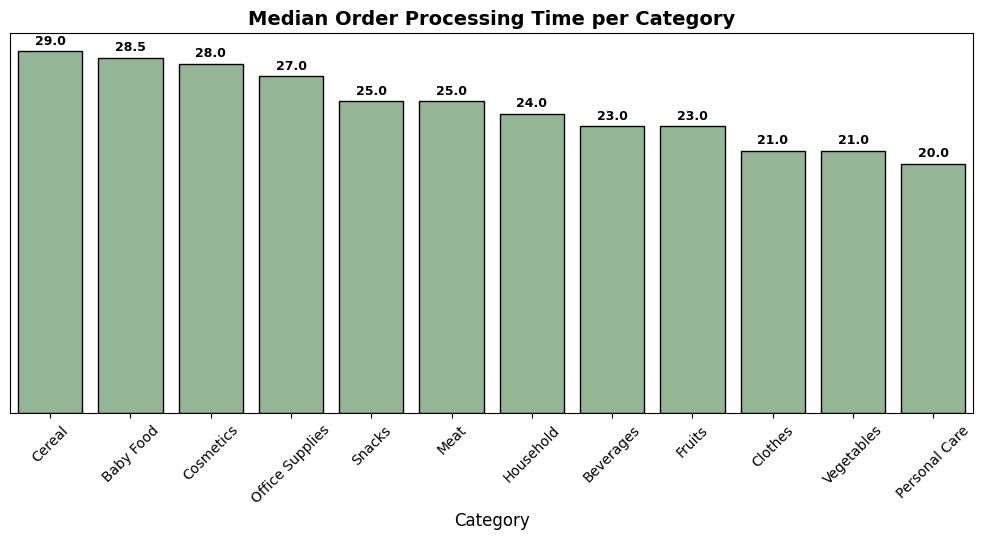

In [ ]:
# Median processing time per category (sorted descending)
category_processing_time_stats = (
    sales_data.groupby("category", as_index=False)["processing_time"]
    .median()
    .sort_values(by="processing_time", ascending=False)
)

# Creating a bar plot
plt.figure(figsize=(10, 5.5))
ax = sns.barplot(
    data=category_processing_time_stats,
    x="category",
    y="processing_time",
    edgecolor="black",
    color="darkseagreen"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 0.01 * ax.get_ylim()[1],
        f"{p.get_height():.1f}",
        ha="center", va="bottom",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Median Order Processing Time per Category", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()

Найдовший час обробки замовлень спостерігається у категоріях **Cereal (29 днів)**, **Baby Food (28.5 днів)** та **Cosmetics (28 днів)**.  
Найшвидше опрацьовуються замовлення у категоріях **Personal Care (20 днів)**, **Vegetables** та **Clothes** **(по 21 дню)**.  

**Висновок:** Категорії з найдовшими строками обробки (Cereal, Baby Food, Cosmetics) можуть створювати додаткові ризики для задоволеності клієнтів. Бізнесу варто проаналізувати причини затримок у цих сегментах та розглянути шляхи оптимізації логістики чи процесів постачання.


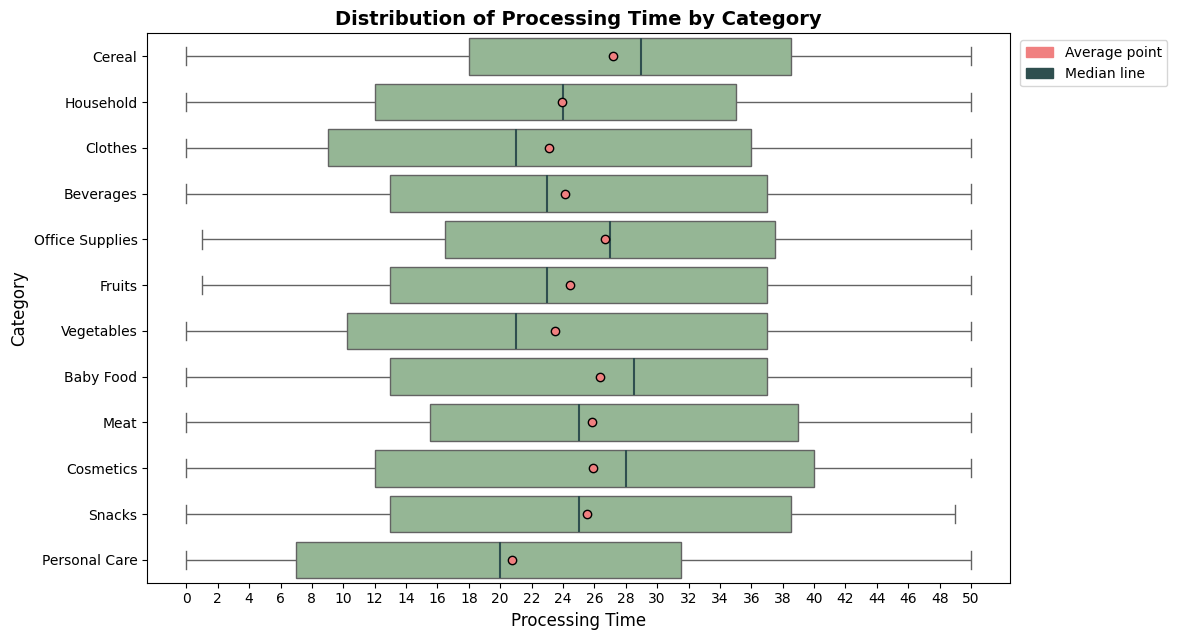

In [ ]:
# Creating a box plot
plt.figure(figsize=(12, 6.5))
sns.boxplot(
data=sales_data,
x="processing_time",
y="category",
color="darkseagreen",
showmeans=True,
meanprops={"marker":"o",
           "markerfacecolor":"lightcoral",
           "markeredgecolor":"black",
           "markersize":"6"},
medianprops={"color":"darkslategray", "linewidth":1.5}
)

# Create a custom legend
mean_patch = mpatches.Patch(color="lightcoral", label="Average point")
median_line = mpatches.Patch(color="darkslategray", label="Median line")
plt.legend(handles=[mean_patch, median_line], loc="upper right", bbox_to_anchor=(1.19, 1))

plt.title("Distribution of Processing Time by Category", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))
plt.tight_layout()
plt.show()

**Household** — найменший розкид: замовлення обробляються приблизно в однакові строки.  
Більшість інших категорій мають **мінливий час**: інколи швидко, інколи суттєво довше.  
Подекуди трапляються **поодинокі дуже довгі випадки** (видно за довгими whiskers та тим, що **mean > median**).

**Висновок:** Бізнес стикається з проблемою непередбачуваності доставки, що може впливати на задоволеність клієнтів. Це сигнал до аналізу процесів: чи проблема у постачальниках, логістиці, чи в управлінні запасами.



### Monthly revenue by Category

In [ ]:
# Aggregate monthly revenue by category
monthly_category = (
    sales_data
    .groupby([pd.Grouper(key="order_date", freq="ME"), "category"], as_index=False)["revenue"]
    .sum()
)

# Custom color palette for categories
custom_colors_categories = [
    "darkseagreen", "tan", "lightcoral", "cornflowerblue",
    "goldenrod", "plum", "slategray", "peru",
    "teal", "rosybrown", "darkkhaki", "mediumaquamarine"
]

# Create line chart
fig = px.line(
    monthly_category,
    x="order_date",
    y="revenue",
    color="category",
    title="Monthly Revenue by Category",
    height=800,
    color_discrete_sequence=custom_colors_categories
)

# Show only "Baby Food" initially; keep other categories hidden in the legend
for trace in fig.data:
    if trace.name == "Baby Food":
        trace.visible = True
    else:
        trace.visible = "legendonly"

# Customize layout, axes, range slider, and line style
fig.update_layout(xaxis_title="Month", yaxis_title="Revenue", plot_bgcolor="white", legend_title_text="Category")
fig.update_xaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_xaxes(
    rangeslider=dict(
        visible=True,
        yaxis=dict(rangemode="fixed"),
        thickness=0.05,
        bgcolor="whitesmoke",
        bordercolor="black",
        borderwidth=1
    )
)
fig.update_traces(mode="lines+markers", hovertemplate="%{x|%Y-%m}<br>%{y:,.0f}")

fig.show()

Помічається виражена **місячна сезонність** і висока **волатильність** у частини категорій.  
- **Office Supplies** та **Cosmetics** мають найбільшу амплітуду коливань із піками (до `~15–18M`); **Household** — періодичні сплески, особливо в середині 2016–2017.  
- Більшість інших категорій (Vegetables, Snacks, Personal Care, Cereal) тримаються ближче до базового рівня з епізодичними піками < `~5M`; **Fruits** майже завжди біля `100K`.  
- Ранжування між категоріями загалом стабільне: ті, що лідирують за амплітудою (Office Supplies, Cosmetics, Household), роблять це впродовж більшості місяців.  
- Окремі різкі сплески виглядають як **одноразові події** (акції тощо).

**Висновок:** Місячний дохід формують кілька категорій із високою волатильністю (Office Supplies, Cosmetics, Household). Для них варто планувати запаси та маркетинг під пікові періоди, а також окремо відслідковувати аномальні сплески (кампанії vs разові великі угоди).  


## Analysis by Country

### Sales analysis by Country (Top 15)

In [ ]:
# Grouping by top 15 country and calculating revenue, cost, profit and units sold for each country
country_stats = (
    sales_data
    .groupby("country_name", as_index=False)[["revenue","cost","profit","units_sold"]]
    .sum()
)

# Remove rows where country is "Unknown"
country_stats = country_stats[country_stats["country_name"] != "Unknown"]

In [ ]:
# Builds a bar chart for the selected metric (revenue, cost, profit or units sold), with countries sorted in descending order
interactive(
    lambda metric: (

        # Unknown values for the selected metrics
        (unknown_value := sales_data.loc[sales_data["country_name"] == "Unknown", metric].sum()),

        (plt.figure(figsize=(9, 7)),
        (ax := sns.barplot(
            data=country_stats,
            x=metric,
            y="country_name",
            order=country_stats.sort_values(metric, ascending=False)["country_name"].head(15),
            edgecolor="black",
            color="honeydew"
        )),

        # Add labels to each bar
        [ax.text(
            p.get_width() - 0.01 * ax.get_xlim()[1],
            p.get_y() + p.get_height()/2,
            f'{p.get_width():,.0f}',
            ha="right", va="center",
            fontsize=9,
            fontweight="semibold"
        ) for p in ax.patches],

        plt.title(
            f"{metric.title()} by Country ($)"
            if metric in ["revenue", "cost", "profit"]
            else f"{metric.replace('_', ' ').title()} by Country",
            fontsize=14, fontweight="bold"),
        plt.ylabel(""),
        plt.xlabel(""),
        plt.xticks([]),

        # Add note about Unknown values for the selected metric
        plt.figtext(
            0.99, 1.05,
            f"Note: Unknown = {unknown_value:,.0f}",
            transform=ax.transAxes,
            ha="right", va="bottom",
            fontsize=10, style="italic", color="black"),

        plt.tight_layout(),
        plt.show()
    )),
    metric=["revenue","cost","profit","units_sold"]
)

> **Revenue by Country**

Топ-3 за виручкою: **Czech Republic** (`~53.5M`), **Ukraine** (`~53.3M`), **Bosnia and Herzegovina** (`~50.1M`).  
Діапазон виручки доволі рівномірний у топ-15, різниця між місцями невелика.  
**Висновок:** Використати рейтинг виручки для **пріоритизації ринків**, але приймати рішення з урахуванням маржі.
___  
> **Cost by Country**  

Найвищі витрати: **Czech Republic** (`~39.9M`), **Ukraine** (`~38.4M`), **Bosnia and Herzegovina** (`~36.9M`).  
**Висновок:** Структура витрат загалом **корелює з виручкою**.
___
> **Profit by Country**

Лідери за прибутком: **Andorra** (`~15.4M`), **Ukraine** (`~14.8M`), **Malta** (`~14.6M`), **San Marino** (`~13.8M`).  
**Czech Republic** має високу виручку, але не №1 за прибутком.  
**Висновок:** **Розвиваємо ринки з високим прибутком**, а там, де виручка велика, а прибуток нижчий — переглядаємо **ціни та собівартість**.
___
> **Units Sold by Country**  

Лідери: **Macedonia**, **San Marino**, **Andorra**, **Greece**, **Malta**.  
Рейтинг за обсягом не збігається з рейтингом за прибутком/виручкою.  
**Висновок:** Оцінювати країни не за обсягом, а за **доходом і прибутком**. Для країн із великими обсягами та низьким заробітком коригуємо **ціни/асортимент**.


### Order-to-Ship time analysis by Country (Top 15)

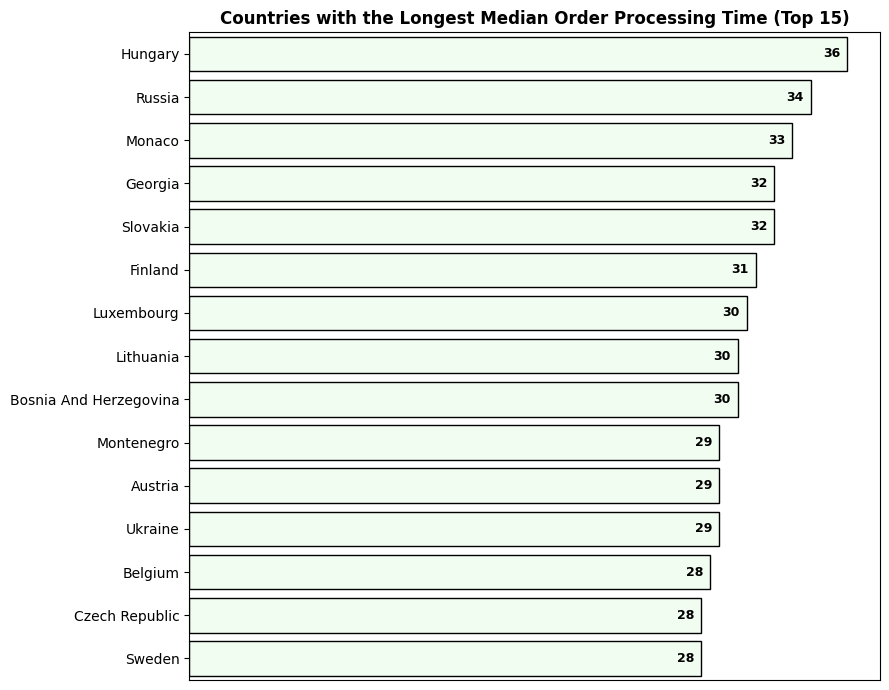

In [ ]:
# Median processing time per top 15 country (sorted descending)
country_processing_time_stats_desc = (
    sales_data.groupby("country_name", as_index=False)["processing_time"]
    .median()
    .sort_values(by="processing_time", ascending=False)
    .head(15)
)

# Creating a bar plot
plt.figure(figsize=(9, 7))
ax = sns.barplot(
    data=country_processing_time_stats_desc,
    x="processing_time",
    y="country_name",
    edgecolor="black",
    color="honeydew"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_width() - 0.01 * ax.get_xlim()[1],
        p.get_y() + p.get_height()/2,
        f'{p.get_width():,.0f}',
        ha="right", va="center",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Countries with the Longest Median Order Processing Time (Top 15)", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
plt.tight_layout()
plt.show()

Топ-3: **Hungary (36 дн)**, **Russia (34)**, **Monaco (33)**.   
У списку є важливі ринки: **Ukraine (29)**, **Czech Republic (28)**, **Bosnia and Herzegovina (30)**.

**Висновок:** Країни з довгим часом обробки можуть створювати додаткові ризики. Варто оптимізувати логістику для ключових ринків (**Ukraine, Czech Republic, Bosnia and Herzegovina**).

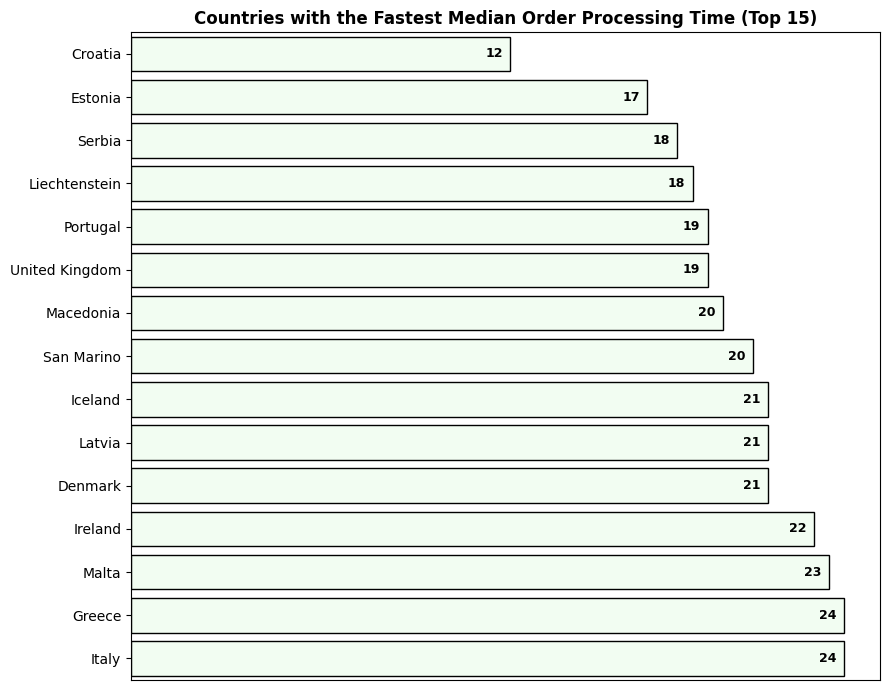

In [ ]:
# Median processing time per top 15 country (sorted ascending)
country_processing_time_stats_asc = (
    sales_data.groupby("country_name", as_index=False)["processing_time"]
    .median()
    .sort_values(by="processing_time")
    .head(15)
)

# Creating a bar plot
plt.figure(figsize=(9, 7))
ax = sns.barplot(
    data=country_processing_time_stats_asc,
    x="processing_time",
    y="country_name",
    edgecolor="black",
    color="honeydew"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_width() - 0.01 * ax.get_xlim()[1],
        p.get_y() + p.get_height()/2,
        f'{p.get_width():,.0f}',
        ha="right", va="center",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Countries with the Fastest Median Order Processing Time (Top 15)", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("")
plt.xticks([])
plt.tight_layout()
plt.show()

Топ-3: **Croatia (12 дн)**, **Estonia (17)**, **Serbia (18)**.  

**Висновок:** Визначаємо, чому в цих країнах швидший процес, і масштабуємо ті ж практики на повільні ринки, якщо це можливо.

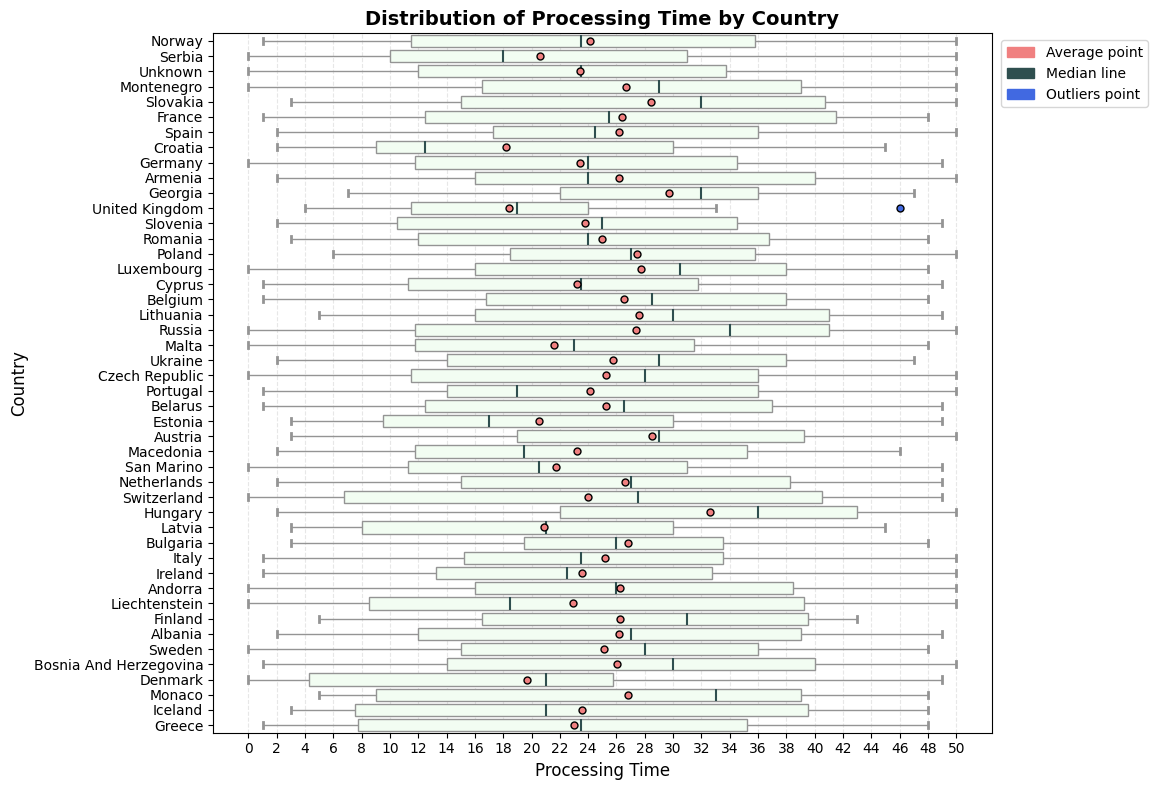

In [ ]:
# Creating a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(
data=sales_data,
x="processing_time",
y="country_name",
color="honeydew",
showmeans=True,
meanprops={"marker":"o",
           "markerfacecolor":"lightcoral",
           "markeredgecolor":"black",
           "markersize":"5"},
medianprops={"color":"darkslategray", "linewidth":1.5},
capprops={"linewidth": 2},
flierprops={"marker": "o",
            "markerfacecolor": "royalblue",
            "markeredgecolor":"black",
            "markersize":"5"},
)

# Create a custom legend
mean_patch = mpatches.Patch(color="lightcoral", label="Average point")
median_line = mpatches.Patch(color="darkslategray", label="Median line")
outliers_patch = mpatches.Patch(color="royalblue", label="Outliers point")
plt.legend(handles=[mean_patch, median_line, outliers_patch], loc="upper right", bbox_to_anchor=(1.21, 1))

plt.title("Distribution of Processing Time by Country", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Більшість країн мають **медіану ~22–28 днів**; вибиваються: **Croatia (~12–18 дн швидше)** та **Hungary/Russia (~33–36 дн довше)**.  
Є **поодинокі дуже довгі випадки**, навіть outliers (помітно біля **United Kingdom**).

**Висновок:** Середній час обробки у більшості країн (~25 днів), спостерігається велика варіативність.


### Monthly revenue by Top 10 Country

In [ ]:
# Group by month and country (exclude 'Unknown')
monthly_country = (
    sales_data[sales_data["country_name"] != "Unknown"]
    .groupby([pd.Grouper(key="order_date", freq="ME"), "country_name"], as_index=False)["revenue"]
    .sum()
)

# Get top 10 countries by total revenue
top_countries = (
    monthly_country.groupby("country_name")["revenue"]
    .sum()
    .nlargest(10)
    .index
)

# Keep only data for the top 10 countries
monthly_top10 = monthly_country[monthly_country["country_name"].isin(top_countries)]

# Custom color palette for countries
custom_colors_countries = [
    "darkseagreen", "tan", "plum", "cornflowerblue",
    "rosybrown", "darkkhaki", "mediumaquamarine",
    "crimson", "royalblue", "darkorange"
]

# Create line chart
fig = px.line(
    monthly_top10,
    x="order_date",
    y="revenue",
    color="country_name",
    title="Monthly Revenue by Top 10 Country",
    height=800,
    color_discrete_sequence=custom_colors_countries
)

# Show only "San Marino" initially; keep other country hidden in the legend
for trace in fig.data:
    if trace.name == "San Marino":
        trace.visible = True
    else:
        trace.visible = "legendonly"

# Customize layout, axes, range slider, and line style
fig.update_layout(xaxis_title="Month", yaxis_title="Revenue", plot_bgcolor="white", legend_title_text="Country")
fig.update_xaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_xaxes(
    rangeslider=dict(
        visible=True,
        yaxis=dict(rangemode="fixed"),
        thickness=0.05,
        bgcolor="whitesmoke",
        bordercolor="black",
        borderwidth=1
    )
)
fig.update_traces(mode="lines+markers", hovertemplate="%{x|%Y-%m}<br>%{y:,.0f}")

fig.show()

Динаміка **високоволатильна**: більшість ринків мають разові піки, а не рівний тренд.  
Помітні **локальні сплески**: Russia (2011–2014), Ukraine (2011/2017), Macedonia — різкий ріст у 2016–2017.  
Видно **одноразовий високий пік** для Portugal у середині 2014 року; до і після — рівень значно нижчий.
Частина місяців у країн — **нульові**, що вказує на епізодичні продажі.  
Ротація лідерів між місяцями: **ранг країни змінюється часто**, отже середній місячний рейтинг не стабільний.  

**Висновок:** Стійкої сезонності не видно, доходи **волатильні** й залежать від разових подій.

## Analysis by Region

### Sales analysis by Region

In [ ]:
# Grouping by region and calculating revenue, cost, profit and units sold for each region
region_stats = (
    sales_data
    .groupby("region", as_index=False)[["revenue","cost","profit","units_sold"]]
    .sum()
)

In [ ]:
# Builds a bar chart for the selected metric (revenue, cost, profit or units sold), with regions sorted in descending order
interactive(
    lambda metric: (
        plt.figure(figsize=(5, 5.5)),
        (ax := sns.barplot(
            data=region_stats,
            x="region",
            y=metric,
            order=region_stats.sort_values(metric, ascending=False)["region"],
            edgecolor="black",
            color="wheat"
        )),

        # Add labels to each bar
        [ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() + 0.01 * ax.get_ylim()[1],
            f'{p.get_height():,.0f}',
            ha="center", va="bottom",
            fontsize=10,
            fontweight="semibold"
        ) for p in ax.patches],

        plt.title(
            f"{metric.title()} by Region ($)"
            if metric in ["revenue", "cost", "profit"]
            else f"{metric.replace('_', ' ').title()} by Region",
            fontsize=14, fontweight="bold"),
        plt.ylabel(""),
        plt.xlabel("Region", fontsize=12),
        plt.yticks([]),
        plt.tight_layout(),
        plt.show()
    ),
    metric=["revenue","cost","profit","units_sold"]
)

> **Revenue by Region**

**Europe** `~1.51B` — переважна частина всієї виручки.  
**Asia** `~93M` і **Unknown** `~103M` — набагато менше, між собою схожі.  
Картина чітко регіонально концентрована.  
**Висновок:** Фокус на **Європі**, для **Asia** — окремий план росту.
___
> **Cost by Region**

**Europe** `~1.06B` — основна частина витрат.  
**Asia** `~68M`, **Unknown** `~75M` — у набагато менше за Європу.  
**Висновок:** Розподіл витрат загалом слідує за виручкою.
___
> **Profit by Region**

**Europe** `~449M` — головне джерело прибутку.  
**Unknown** `~27.7M` та **Asia** `~25.2M` — помітно менші внески.  
**Висновок:** Профіль прибутку також концентрований у Європі.
___
> **Units Sold by Region**

**Europe** `~5.77M` — майже весь обсяг.  
**Asia** `~410K`, **Unknown** `~405K` — значно менше.  
**Висновок:** Попит і операційне навантаження зосереджені в Європі.


### Order-to-Ship time analysis by Region

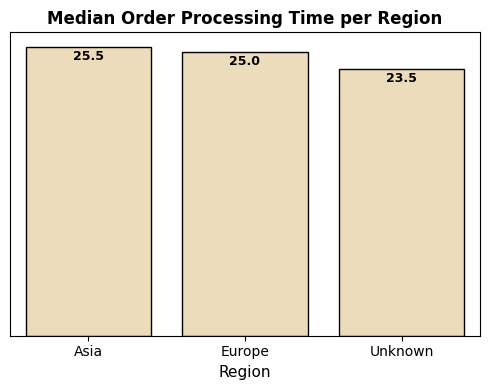

In [ ]:
# Median processing time per region (sorted descending)
region_processing_time_stats = (
    sales_data.groupby("region", as_index=False)["processing_time"]
    .median()
    .sort_values(by="processing_time", ascending=False)
)

# Creating a bar plot
plt.figure(figsize=(5, 4))
ax = sns.barplot(
    data=region_processing_time_stats,
    x="region",
    y="processing_time",
    edgecolor="black",
    color="wheat"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() - 0.01 * ax.get_ylim()[1],
        f"{p.get_height():.1f}",
        ha="center", va="top",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Median Order Processing Time per Region", fontsize=12, fontweight="bold")
plt.ylabel("")
plt.xlabel("Region", fontsize=11)
plt.yticks([])
plt.tight_layout()
plt.show()

**Asia ~25.5 дн**, **Europe ~25.0 дн**, **Unknown ~23.5 дн**.    
`Unknown` виглядає швидшим, але це змішана група й потребує рознесення.

**Висновок:** Різниця між регіонами невелика — близько **2 днів**.


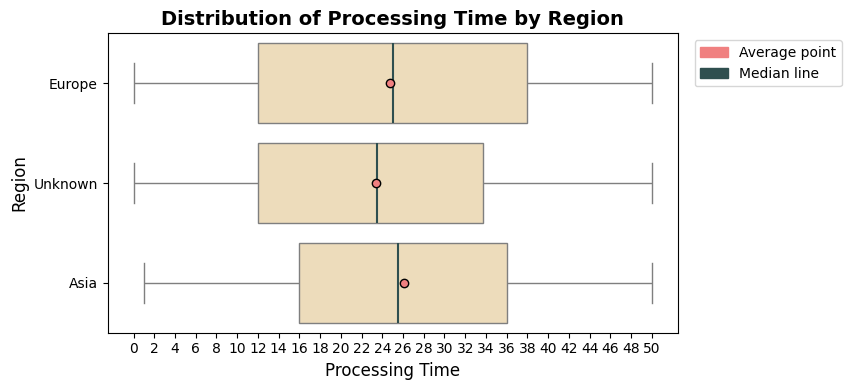

In [ ]:
# Creating a box plot
plt.figure(figsize=(9, 4))
sns.boxplot(
data=sales_data,
x="processing_time",
y="region",
color="wheat",
showmeans=True,
meanprops={"marker":"o",
           "markerfacecolor":"lightcoral",
           "markeredgecolor":"black",
           "markersize":"6"},
medianprops={"color":"darkslategray", "linewidth":1.5},
)

# Create a custom legend
mean_patch = mpatches.Patch(color="lightcoral", label="Average point")
median_line = mpatches.Patch(color="darkslategray", label="Median line")
plt.legend(handles=[mean_patch, median_line], loc="upper right", bbox_to_anchor=(1.3, 1))

plt.title("Distribution of Processing Time by Region", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))
plt.tight_layout()
plt.show()

**Медіани близькі:** Europe ≈25 дн, Asia ≈25–26 дн, Unknown ≈23–24 дн.  
**Варіативність (IQR):** трохи **вужча в Asia**, **ширша в Europe**.  
**Довгі випадки** трапляються всюди (whiskers тягнуться до 50 днів).  
**Середні ≈ медіанам** — сильних перекосів немає.

**Висновок:** Середній час обробки (~25 днів), проте є як і дуже швидкі так і довгі випадки.


### Monthly revenue by Region

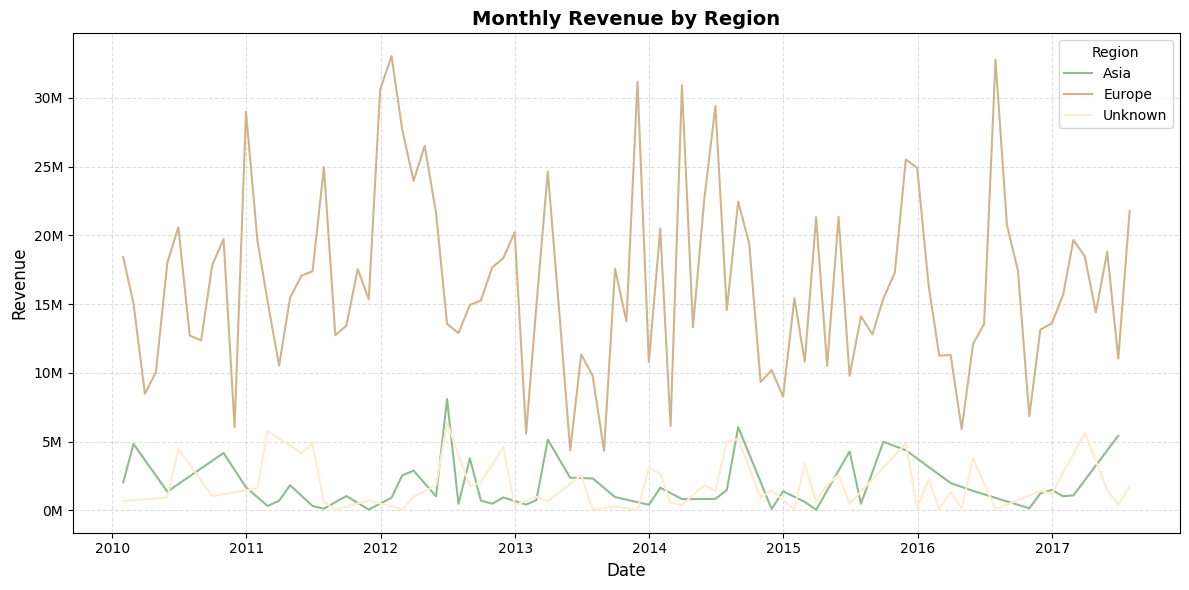

In [ ]:
# Aggregate monthly revenue by region
monthly_region = (
    sales_data
    .groupby([pd.Grouper(key="order_date", freq="ME"), "region"], as_index=False)["revenue"]
    .sum()
)

# Custom color palette for region
custom_colors_regions = ["darkseagreen", "tan", "blanchedalmond"]

# Create line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_region,
    x="order_date",
    y="revenue",
    hue="region",
    palette=custom_colors_regions
)

plt.title("Monthly Revenue by Region", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Formatting the Y axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(
    lambda x, _: f"{x*1e-6:.0f}M"))

plt.legend(title="Region")

plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

**Europe** домінує, але крива **дуже волатильна**: часті піки `~15–30M`, чіткої сезонності не видно.  
**Asia** на значно нижчому рівні, інколи сплески `~3–5M`.  

**Висновок:** Стійкої сезонності не видно, доходи **волатильні** й залежать від разових подій.


## Analysis by Sub-Region

### Sales analysis by Sub-Region

In [ ]:
# Grouping by sub-region and calculating revenue, cost, profit and units sold for each sub-region
sub_region_stats = (
    sales_data
    .groupby("sub_region", as_index=False)[["revenue","cost","profit","units_sold"]]
    .sum()
)

In [ ]:
# Builds a bar chart for the selected metric (revenue, cost, profit or units sold), with sub-regions sorted in descending order
interactive(
    lambda metric: (
        plt.figure(figsize=(9, 6)),
        (ax := sns.barplot(
            data=sub_region_stats,
            x="sub_region",
            y=metric,
            order=sub_region_stats.sort_values(metric, ascending=False)["sub_region"],
            edgecolor="black",
            color="tan"
        )),

        # Add labels to each bar
        [ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() + 0.01 * ax.get_ylim()[1],
            f'{p.get_height():,.0f}',
            ha="center", va="bottom",
            fontsize=10,
            fontweight="semibold"
        ) for p in ax.patches],

        plt.title(
            f"{metric.title()} by Sub-Region ($)"
            if metric in ["revenue", "cost", "profit"]
            else f"{metric.replace('_', ' ').title()} by Sub-Region",
            fontsize=14, fontweight="bold"),
        plt.ylabel(""),
        plt.xlabel("Sub-Region", fontsize=12),
        plt.yticks([]),
        plt.tight_layout(),
        plt.show()
    ),
    metric=["revenue","cost","profit","units_sold"]
)

> **Revenue by Sub-Region**  

Найкращий показник: **Southern Europe** `564.5M`, далі **Eastern** `~378.7M`, **Northern** `~296.4M`, **Western** `~268.5M`.  
**Unknown** `~103.1M` і **Western Asia** `~93.3M` — помітно менші.  
Виручка сконцентрована в **Південній та Східній Європі**.  
**Висновок:** Тримаємо фокус на **Southern/Eastern Europe**, для **Western Asia** — план керованого росту.
___
> **Cost by Sub-Region**  

Найбільші витрати: **Southern Europe** `~397.8M`, **Eastern** `~267.4M`, **Northern** `~205.2M`, **Western** `~188.7M`.  
**Unknown** `~75.4M`, **Western Asia** `~68.2M` — суттєво нижчі.  
**Висновок:** Структура витрат відповідає структурі виручки.
___
> **Profit by Sub-Region**  

Лідери за прибутком: **Southern Europe** `~166.7M`, **Eastern** `~111.3M`, **Northern** `~91.2M`, **Western** `~79.8M`.  
**Unknown** `~27.7M`, **Western Asia** `~25.2M` — невеликий внесок.  
**Висновок:** Профіль прибутку повторює картину виручки.
___
> **Units Sold by Sub-Region**

Обсяги: **Southern Europe** `~2.14M`, **Eastern** `~1.35M`, **Northern** `~1.24M`, **Western** `~1.04M`.  
**Western Asia** `~410K`, **Unknown** `~405K` — у рази менше.  
Попит сконцентрований у підрегіонах Європи.  
**Висновок:** Попит повторює картину картину попередніх показників, що робить **Southern/Eastern Europe** ключовими підрегіонами.




### Order-to-Ship time analysis by Sub-Region

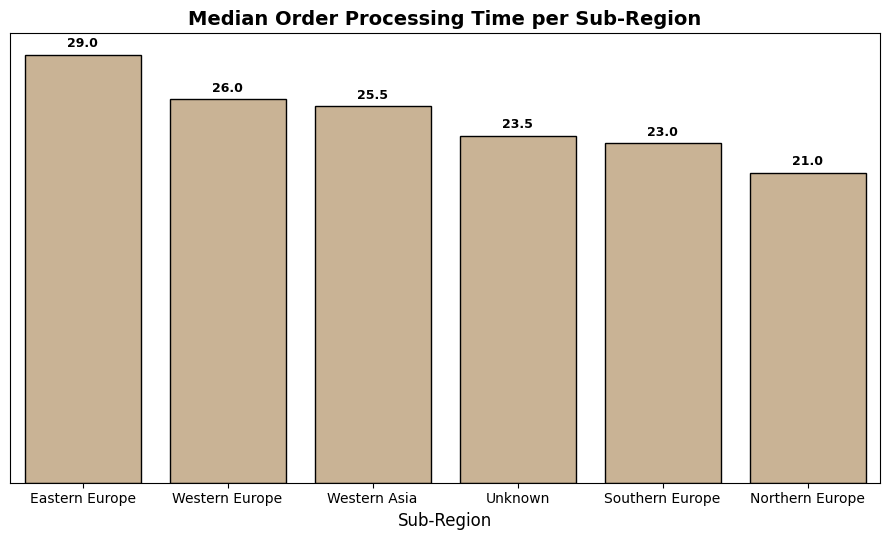

In [ ]:
# Median processing time per sub-region (sorted descending)
sub_region_processing_time_stats = (
    sales_data.groupby("sub_region", as_index=False)["processing_time"]
    .median()
    .sort_values(by="processing_time", ascending=False)
)

# Creating a bar plot
plt.figure(figsize=(9, 5.5))
ax = sns.barplot(
    data=sub_region_processing_time_stats,
    x="sub_region",
    y="processing_time",
    edgecolor="black",
    color="tan"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 0.01 * ax.get_ylim()[1],
        f"{p.get_height():.1f}",
        ha="center", va="bottom",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Median Order Processing Time per Sub-Region", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.xlabel("Sub-Region", fontsize=12)
plt.yticks([])
plt.tight_layout()
plt.show()

**Найдовше:** Eastern Europe — **29 дн**, Western Europe — **26 дн**, Western Asia — **25.5 дн**.  
**Найшвидше** — Northern Europe — **21 дн**.  
Розкид між повільним і швидким підрегіоном — ~**8 днів**
`Unknown` виглядає швидшим, але це змішана група — її варто рознести.

**Висновок:** Розкид між найповільнішим і найшвидшим підрегіоном — ~**8 днів**, що є суттєвим.


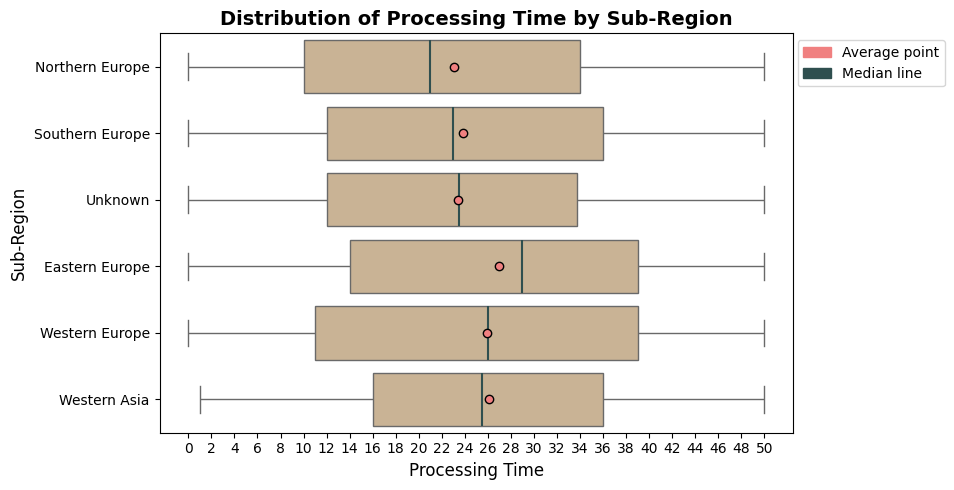

In [ ]:
# Creating a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(
data=sales_data,
x="processing_time",
y="sub_region",
color="tan",
showmeans=True,
meanprops={"marker":"o",
           "markerfacecolor":"lightcoral",
           "markeredgecolor":"black",
           "markersize":"6"},
medianprops={"color":"darkslategray", "linewidth":1.5},
)

# Create a custom legend
mean_patch = mpatches.Patch(color="lightcoral", label="Average point")
median_line = mpatches.Patch(color="darkslategray", label="Median line")
plt.legend(handles=[mean_patch, median_line], loc="upper right", bbox_to_anchor=(1.25, 1))

plt.title("Distribution of Processing Time by Sub-Region", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Sub-Region", fontsize=12)
plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))
plt.tight_layout()
plt.show()

**Медіани** в межах **21–29 дн**: найшвидше — **Northern Europe (~21)**, найдовше — **Eastern Europe (~29)**.  
**Варіативність:** найбільший розкид у **Western Europe**.  
**Довгі випадки** (до 50 днів) трапляються у всіх підрегіонах.

**Висновок:** Середній час обробки (~25 днів), проте є як і дуже швидкі так і довгі випадки. **Northern Europe** беремо як **основу** для скорочення строків відгрузки у повільніших підрегіонах.


### Monthly revenue by Sub-Region

In [ ]:
# Aggregate monthly revenue by sub-region
monthly_sub_region = (
    sales_data
    .groupby([pd.Grouper(key="order_date", freq="ME"), "sub_region"], as_index=False)["revenue"]
    .sum()
)

# Custom color palette for sub-region
custom_colors_sub_regions = [
    "darkseagreen", "tan", "lightcoral",
    "blanchedalmond", "cornflowerblue","rosybrown"
]

# Create line chart
fig = px.line(
    monthly_sub_region,
    x="order_date",
    y="revenue",
    color="sub_region",
    title="Monthly Revenue by Sub-Region",
    height=800,
    color_discrete_sequence=custom_colors_sub_regions
)

# Show only "Northern Europe" initially; keep other sub-regions hidden in the legend
for trace in fig.data:
    if trace.name == "Northern Europe":
        trace.visible = True
    else:
        trace.visible = "legendonly"

# Customize layout, axes, range slider, and line style
fig.update_layout(xaxis_title="Month", yaxis_title="Revenue", plot_bgcolor="white", legend_title_text="Sub-Region")
fig.update_xaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=True, gridcolor="lightgrey", linewidth=1, linecolor="black", mirror=True)
fig.update_xaxes(
    rangeslider=dict(
        visible=True,
        yaxis=dict(rangemode="fixed"),
        thickness=0.05,
        bgcolor="whitesmoke",
        bordercolor="black",
        borderwidth=1
    )
)
fig.update_traces(mode="lines+markers", hovertemplate="%{x|%Y-%m}<br>%{y:,.0f}")

fig.show()

 Картина **волатильна** у всіх підрегіонах — замість стабільної сезонності бачимо разові піки.  
**Southern Europe** — найчастіше та найвищі сплески (до ~16–18M у різні роки).  
**Eastern Europe** — теж регулярні піки (особливо 2011 та 2016–2017).  
**Western Europe** — середні за величиною хвилі. Базовий рівень тримається, але з епізодичними ривками.  
**Northern Europe** — нижчі амплітуди, проте періодичні підйоми присутні, окрім випадку в 2012.  
**Western Asia** та **Unknown** — найнижчі значення з поодинокими подіями.

**Висновок:** Як і в випадку з країнами та регіонами стійкої сезонності не видно, доходи **волатильні** й залежать від разових подій.

## Analysis by Sales Channel

### Sales analysis by Channel

In [ ]:
# Grouping by sales channel and calculating revenue, cost, profit and units sold for each sales channel
sales_channel_stats = (
    sales_data
    .groupby("sales_channel", as_index=False)[["revenue","cost","profit","units_sold"]]
    .sum()
)

In [ ]:
# Builds a bar chart for the selected metric (revenue, cost, profit or units sold), with sales channels sorted in descending order
interactive(
    lambda metric: (
        plt.figure(figsize=(5, 5)),
        (ax := sns.barplot(
            data=sales_channel_stats,
            x="sales_channel",
            y=metric,
            order=sales_channel_stats.sort_values(metric, ascending=False)["sales_channel"],
            edgecolor="black",
            color="blanchedalmond"
        )),

        # Add labels to each bar
        [ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() - 0.02 * ax.get_ylim()[1],
            f'{p.get_height():,.0f}',
            ha="center", va="top",
            fontsize=10,
            fontweight="semibold"
        ) for p in ax.patches],

        plt.title(
            f"{metric.title()} by Sales Channel ($)"
            if metric in ["revenue", "cost", "profit"]
            else f"{metric.replace('_', ' ').title()} by Sales Channel",
            fontsize=14, fontweight="bold"),
        plt.ylabel(""),
        plt.xlabel("Sales Channel", fontsize=12),
        plt.yticks([]),
        plt.tight_layout(),
        plt.show()
    ),
    metric=["revenue","cost","profit","units_sold"]
)

> **Revenue by Sales Channel**  

**Offline** `~874M`, **Online** `~830M` — канали за виручкою майже рівні, офлайн трохи вище (~5%).  
**Висновок:** Баланс каналів — немає явного лідера.
___
> **Cost by Sales Channel**

**Offline** `~620M` витрат > **Online** `~582M`.  
**Висновок:** Офлайн обходяться дорожче.
___
> **Profit by Sales Channel**

Прибуток **дуже близький**: Offline `~254M`, Online `~248M` (різниця ~2%).  
**Висновок:** Маржа **майже однакова** в обох каналах.
___
> **Units Sold by Sales Channel**  

Обсяги **практично рівні**: Offline `~3.33M`, Online `~3.26M` (різниця ~2%).  
**Висновок:** Операційне навантаження розподілене **майже 50/50**.



### Monthly Revenue by Sales Channel

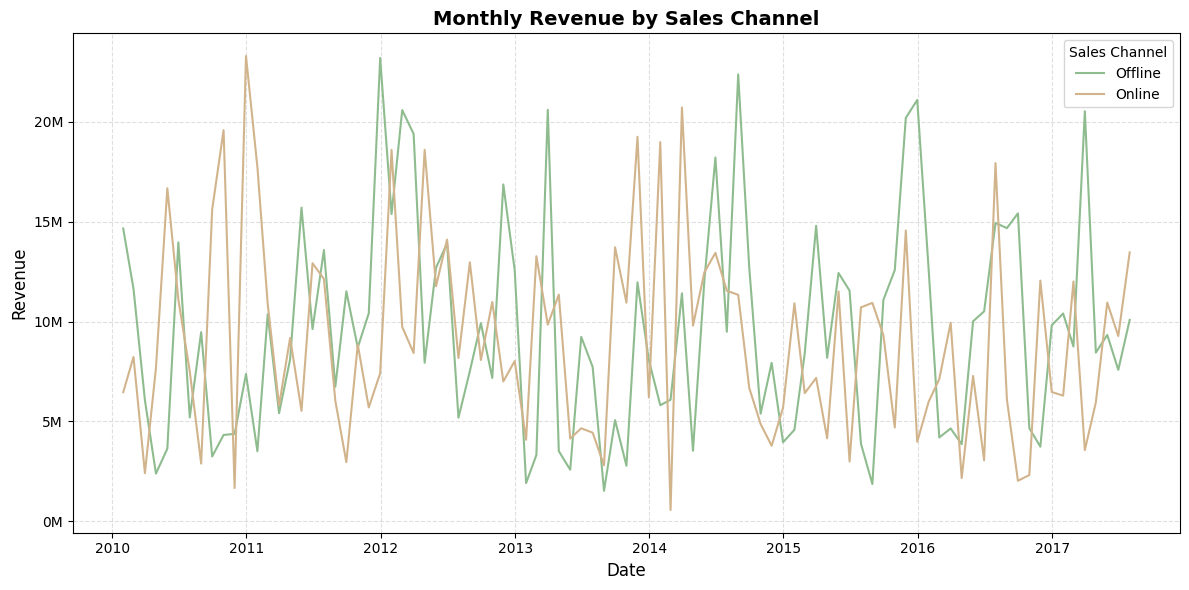

In [ ]:
# Aggregate monthly revenue by sales channel
monthly_channel = (
    sales_data.groupby([pd.Grouper(key="order_date", freq="ME"), "sales_channel"], as_index=False)["revenue"]
    .sum()
)

# Custom color palette for sales channel
custom_colors_channels = ["darkseagreen", "tan"]

# Create line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_channel,
    x="order_date",
    y="revenue",
    hue="sales_channel",
    palette=custom_colors_channels
)

plt.title("Monthly Revenue by Sales Channel", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Formatting the Y axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(
    lambda x, _: f"{x*1e-6:.0f}M"))

plt.legend(title="Sales Channel")

plt.grid(linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Обидва канали **волатильні**, явної сезонності немає.  
**Online** та **Offline** час від часу дають **вищі піки**.

**Висновок:** Піки **не завжди збігаються** між каналами, ймовірно, різні кампанії/угоди в різний час.


## Analysis of profit by Processing Time

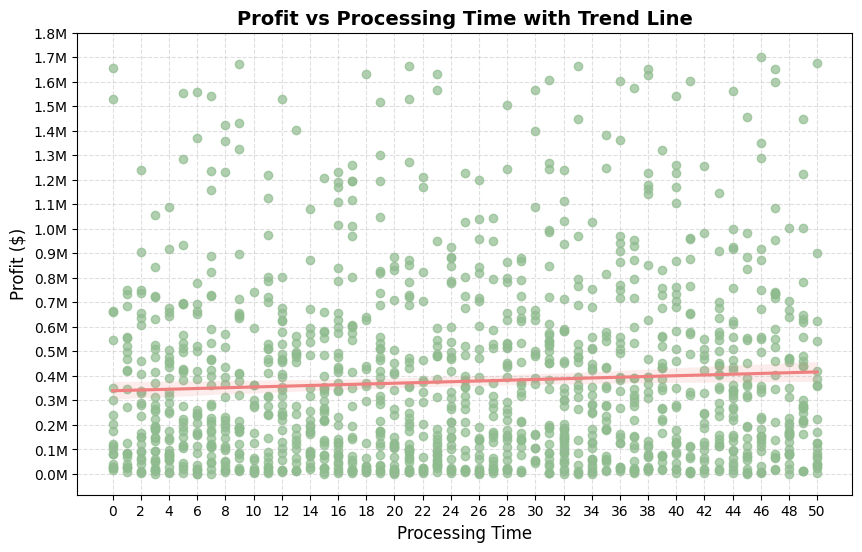

In [ ]:
# Scatterplot of profit vs processing time with regression trend line
plt.figure(figsize=(10,6))
sns.regplot(
    data=sales_data,
    x="processing_time",
    y="profit",
    scatter_kws={"alpha":0.7},
    line_kws={"color":"lightcoral"},
    color="darkseagreen"
)
plt.title("Profit vs Processing Time with Trend Line", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))
plt.yticks(np.arange(0, sales_data["profit"].max() + 100000, 100000))

# Formatting the Y axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(
    lambda x, _: f"{x*1e-6:.1f}M"))

plt.grid(linestyle="--", alpha=0.4)
plt.show()

Більшість замовлень мають прибуток нижче **0.5M**, незалежно від часу обробки.  
Є поодинокі великі угоди (до ~1.7M), але вони розподілені випадково.  
Лінія тренду майже горизонтальна з легким зростанням — **зв’язок дуже слабкий**.  

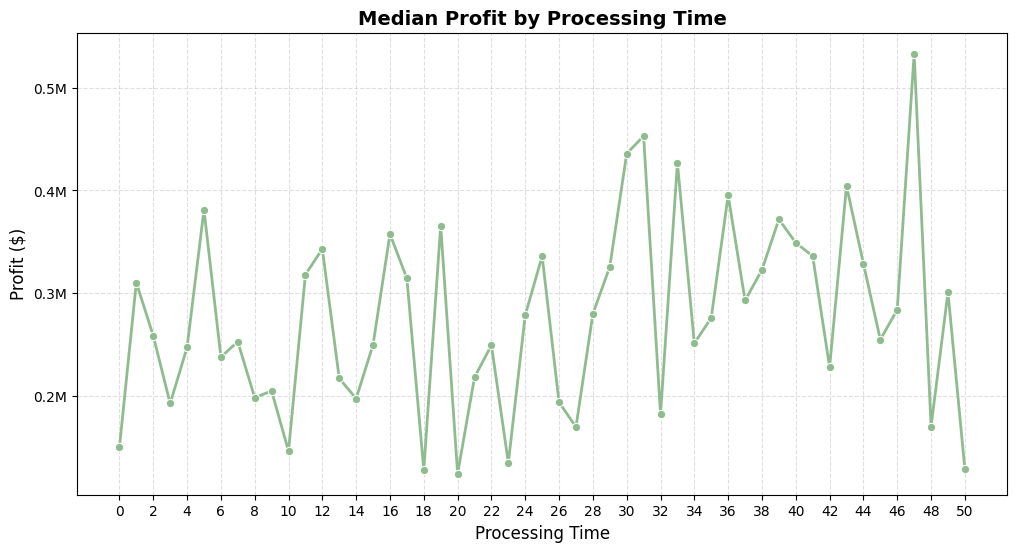

In [ ]:
# Aggregate median profit by processing time
processing_time_profit = (
    sales_data.groupby("processing_time")["profit"]
    .median()
    .reset_index()
)

# Creating a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=processing_time_profit,
    x="processing_time",
    y="profit",
    marker="o",
    color="darkseagreen",
    linewidth=2
)

plt.title("Median Profit by Processing Time", fontsize=14, fontweight="bold")
plt.xlabel("Processing Time", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)

plt.xticks(np.arange(0, sales_data["processing_time"].max() + 2, 2))

# Formatting the Y axis
plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x*1e-6:.1f}M")
)

plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [ ]:
correlation = sales_data["processing_time"].corr(sales_data["profit"])
print("Correlation between processing time and profit:", correlation)

Correlation between processing time and profit: 0.060662221599087345


Значення медіанного прибутку коливається у межах **0.2M–0.5M** без чіткої закономірності.  
Видно сильні коливання від точки до точки — прибуток залежить не від часу, а від характеристик конкретних замовлень.  
Обчислений коефіцієнт кореляції ≈ **0.06** — зв’язок між часом обробки та прибутком **практично відсутній**.  
Навіть при довших строках (30–45 днів) спостерігаються як високі, так і середні прибутки, що підтверджує випадковість розподілу.

## Analysis by Weekday

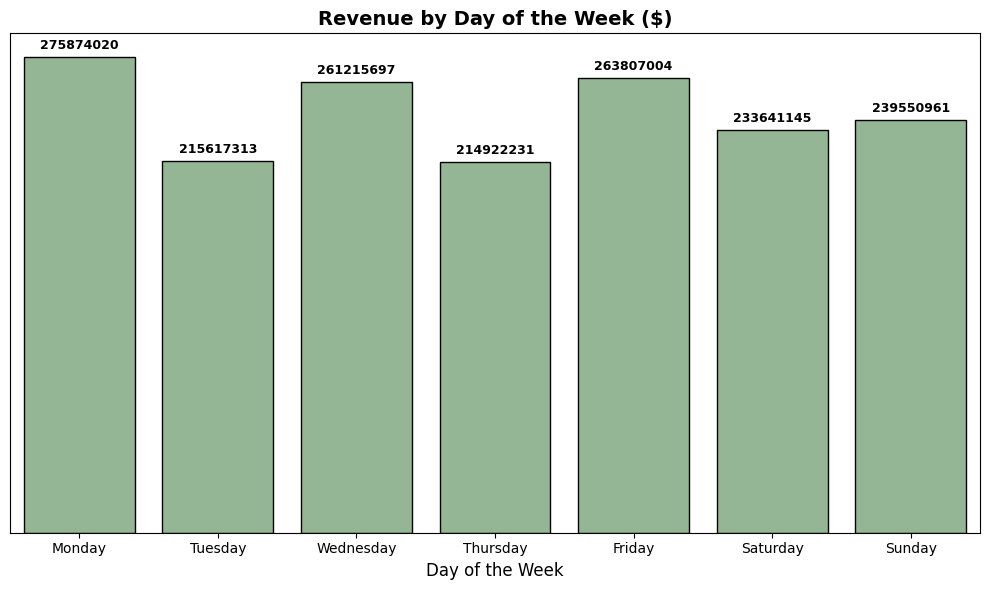

In [ ]:
# Create column with day of the week
sales_data["weekday"] = sales_data["order_date"].dt.day_name()

# Aggregate total revenue by weekday in correct order
weekday_sales = (
    sales_data.groupby("weekday")["revenue"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .reset_index()
)

# Creating a bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=weekday_sales,
    x="weekday",
    y="revenue",
    color="darkseagreen",
    edgecolor="black"
)

# Add labels to each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 0.01 * ax.get_ylim()[1],
        f"{p.get_height():.0f}",
        ha="center", va="bottom",
        fontsize=9,
        fontweight="semibold"
    )

plt.title("Revenue by Day of the Week ($)", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.yticks([])
plt.xlabel("Day of the Week", fontsize=12)
plt.tight_layout()
plt.show()

Найвищий дохід формується у **понеділок** (`~27.6M`) та **п’ятницю** (`~26.4M`).  
Найнижчі показники — у **вівторок** (`~21.6M`) та **четвер (`~21.5M`).  
Вихідні (субота-неділя) тримаються на середньому рівні (`~23.3–23.9M`).  
Розрив між піковими та найслабшими днями сягає `~6M`.  


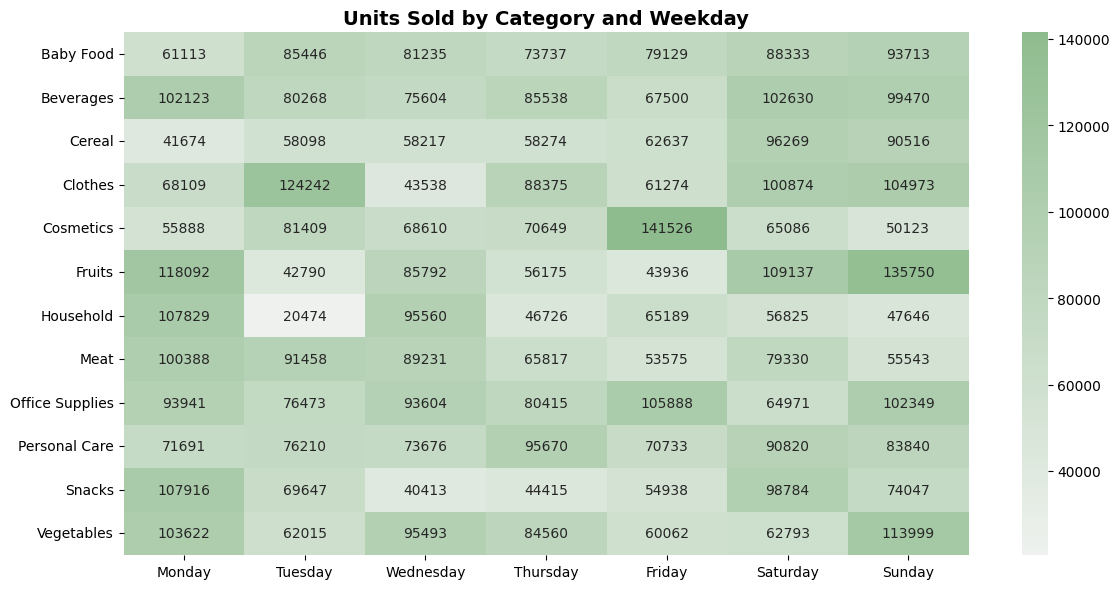

In [ ]:
# Weekday in correct order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Pivot table with sum aggregation and fill missing values with zeros
pivot_table = pd.pivot_table(
    sales_data,
    index="category",
    columns="weekday",
    values="units_sold",
    aggfunc="sum",
    fill_value=0,
    observed=False
).reindex(columns=weekday_order)

# Create a custom color palette based on the "tan" color
seagreen_cmap = sns.light_palette("darkseagreen", as_cmap=True)

# Creating a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap=seagreen_cmap, annot=True, fmt=".0f")
plt.title("Units Sold by Category and Weekday", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

**Понеділок** — активний старт тижня: високі продажі у багатьох категоріях.  
**Вівторок–четвер** — падіння у більшості категорій (особливо Household, Fruits, Clothes).  
**П’ятниця** — різке зростання в Cosmetics (`141K`) та Office Supplies (`106K`).  
**Субота** — стабільні середні показники, без пікових стрибків.  
**Неділя** — високий попит на Fruits (`136K`) і Vegetables (`114K`).

## Seasonality of Units Sold by Category

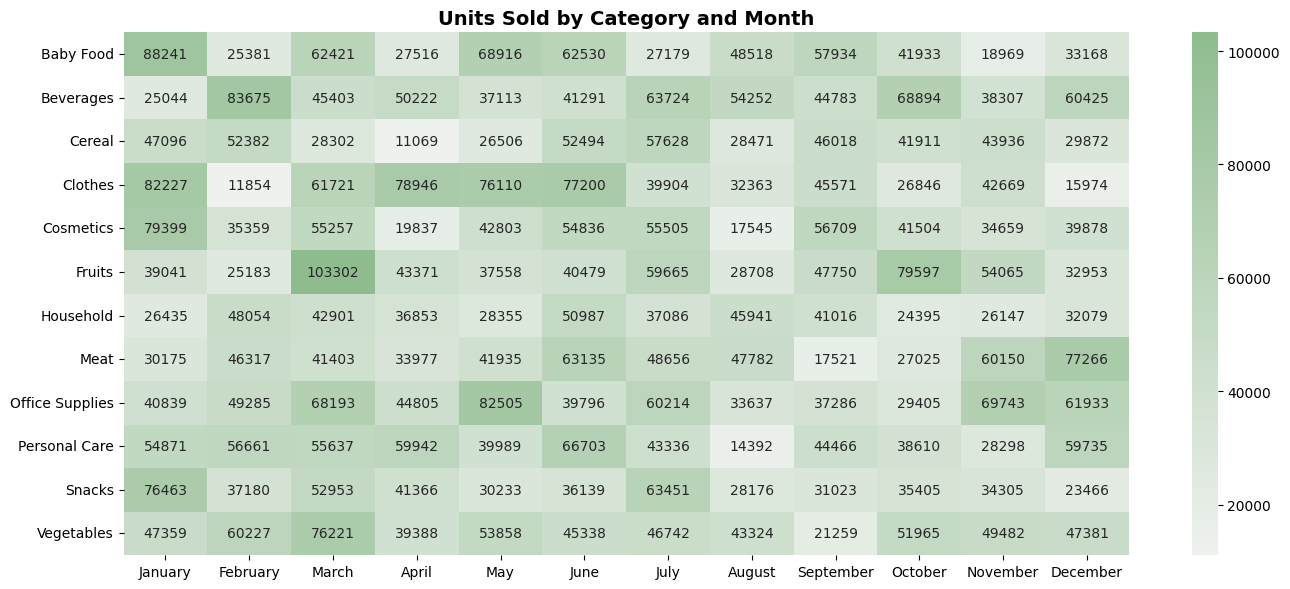

In [ ]:
# Define months in correct order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Extract month name from order_date
sales_data["month"] = sales_data["order_date"].dt.month_name()

# Pivot table with sum aggregation and fill missing values with zeros
pivot_table_month = pd.pivot_table(
    sales_data,
    index="category",
    columns="month",
    values="units_sold",
    aggfunc="sum",
    fill_value=0,
    observed=False
).reindex(columns=month_order)

# Creating a heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_month, cmap=seagreen_cmap, annot=True, fmt=".0f")
plt.title("Units Sold by Category and Month", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

**Baby Food**: різкі коливання — піки у січні (`~88K`), березні (`~62K`), червні (`~62K`), падіння у лютому та листопаді.  
**Beverages**: підйоми у лютому (`~84K`), липні (`~64K`), жовтні (`~69K`), грудні (`~60K`).  
**Clothes**: сильний стрибок у березні–червні (`~62–78K`), спад восени (жовтень–грудень).  
**Cosmetics**: стабільні середні рівні (`~50–55K`), але піки у січні (`~79K`) та червні (`~55K`).  
**Fruits**: яскраво виражений сезонний пік у березні (`~103K`) та жовтні (`~80K`).  
**Vegetables**: високі продажі у березні (`~76K`), червні (`~45K`), листопаді (`~49K`).  
**Meat**: піки влітку та наприкінці року — червень (`~63K`), листопад (`~60K`), грудень (`~77K`).  
**Office Supplies**: сильний попит у травні (`~82K`), листопаді (`~70K`), грудні (`~62K`).  
**Snacks**: сплески у січні (`~76K`), липні (`~63K`).

# Reporting

## Summary Analysis
> Category
1. **Ключові генератори прибутку:** Cosmetics та Office Supplies — найстратегічніші категорії для розвитку.  
2. **Зони ризику:** Beverages і Meat потребують перегляду цінової або витратної стратегії.  
3. **Стабільність процесів:** Категорії з високою варіативністю у часі виконання замовлень слід дослідити детальніше — можливі проблеми в постачанні чи логістиці.  
4. **Сезонність:** Структурувати маркетингові та виробничі плани з урахуванням пікових місяців у ключових категоріях.  

Загалом, бізнес має чіткі точки росту (Cosmetics, Office Supplies) та категорії, що знижують загальну ефективність (Beverages, Meat, частково Cereal через довгі строки виконання). Категорію Clothes варто масштабувати завдяки високій маржинальності.

> Country
1. **Приоритезація ринків:** Інвестуємо в країни з **найвищим прибутком** (напр., Andorra, Ukraine, Malta, San Marino).  
2. **Великі обсяги з низькою маржею:** Переглядаємо ціни, знижки, асортимент, щоб підняти прибуток.  
3. **Трансфер підходів:** Визначаємо, чому в одних країнах відгрузка відбувається швидше, і масштабуємо ті ж практики на повільні ринки, якщо це можливо.  
4. **Керування волатильністю:** Ведемо помісячне планування, позначаємо місяці з промо/великими закупівлями.    
5. **Дані:** Робимо **атрибуцію `Unknown`** (Revenue/Cost/Units/Profit), щоб KPI по країнах були коректні.  
6. **Середній час обробки відвантаження:** Дослідити детальніше — можливі проблеми в постачанні чи логістиці через високу варіативність по всіх країнах.

Загалом, фокус на ринки з високою **маржею**, зниження, де витрати високі, перенесення **швидких підходів** у відгрузці на повільні, дослідити можливі проблеми з відгрузкою та **щомісячне** планування з урахуванням подій.

> Region
1. **Фокус**: тримаємо й масштабуємо Європу, для Азії — варто дослідити перспективи зростання, де зараз частка доходу невелика, але є значний потенціал.
2. **Керування волатильністю:** Ведемо помісячне планування, позначаємо місяці з промо/великими закупівлями.    
3. **Дані**: **рознести `Unknown`** і зрозуміти причину винекнення по регіонах, інакше KPI та пріоритезація будуть неточними.
4. **Середній час обробки відвантаження:** Хоч і в середньому одинаковий потрібно дослідити детальніше — можливі проблеми в постачанні чи логістиці через високу варіативність.

Загалом, Європа — основна точка росту бізнесу, Азія — потенціал з перспективою зростання. Як і в випадку з країнами виявити причини виникнення значення Unknown, так як частка значна.

> Sub-Region
1. **Фокус:** утримуємо й масштабуємо **Southern/Eastern Europe**; **Western/Northern** — підтримка з точковими ініціативами.  
2. **Керування волатильністю:** Ведемо помісячне планування, позначаємо місяці з промо/великими закупівлями.
3. **Середній час обробки відвантаження:** Дослідити детальніше — можливі проблеми в постачанні чи логістиці через високу варіативність. **Northern Europe** беремо як **основу** для скорочення строків відгрузки у повільніших підрегіонах.
4. **Дані:** **рознести `Unknown`** і зрозуміти причину винекнення по регіонах, інакше KPI та пріоритезація будуть неточними.

Загалом, **Південь і Схід Європи — точки росту**, **Північ Європи — основа** для скорочення строків відгрузки, **щомісячне** планування і в випадку як і з країнами і регіонами виявити причини виникнення значення Unknown.

> Sales Channel
1. **Підтримуємо обидва канали**: підтримуємо кожен своїми акціями, не “переливаємо” клієнтів між ними.
2. **Офлайн — здешевити виконання**: адже при фактично іденичних показниках має більші витрати.
3. **Керування волатильністю:** Ведемо помісячне планування, позначаємо місяці з промо/великими закупівлями.

Загалом, канали **збалансовані**, тож зростання робимо через **ефективність**, а не перерозподіл: знижуємо **офлайн-витрати** та ведемо **помісячне планування**.

## Conclusion
Бізнес має чіткі точки росту (маржинальні категорії та ринки Південно-Східної Європи), але потребує контролю над волатильністю процесів і вирішення проблеми невідомих даних (Unknown). Стратегія — масштабування маржинальних напрямів, оптимізація витрат у слабких сегментах, щомісячне планування та перенесення кращих практик швидкого відвантаження ринків/категорій на відстаючі.  

**Прибуток не залежить від часу обробки** — кореляція майже нульова. Скорочення строків не знизить фінансовий результат, тож бізнес може оптимізувати процеси без ризику для прибутковості.  

Продажі та виручка мають **чіткий тижневий ритм**: понеділок і п’ятниця — пікові дні (високий дохід і зростання ключових категорій), вівторок–четвер — спад активності, вихідні тримаються на середньому рівні з підвищеним попитом на свіжі продукти (Fruits, Vegetables). Це вказує на циклічність попиту й потребу у підсиленні промо в середині тижня та правильному плануванні ресурсів на пікові дні.

Деякі товари в тижневому розрізі можна вважати **сезонними або циклічними**. Наприклад, свіжі продукти (Fruits, Vegetables) мають зростання у вихідні, а Cosmetics та Office Supplies показують піки у п’ятницю. Є **тижнева закономірність** у попиті, яку варто враховувати у плануванні.

Деякі категорії **мають місячну сезонність**: Fruits і Vegetables з піками навесні та восени, Clothes у весняно-літній період, Meat влітку та наприкінці року, а Office Supplies — у травні та передноворічний сезон. Це означає, що планування закупівель та маркетингових кампаній має бути сезонно адаптованим для ключових категорій.
